In [3]:
using Laplacians

INFO: Recompiling stale cache file /Users/spielman/.julia/lib/v0.4/Laplacians.ji for module Laplacians.
INFO: Building PyCall
INFO: No system-wide Python was found; got the following error:
could not spawn `'' -c "import distutils.sysconfig; print(distutils.sysconfig.get_config_var('VERSION'))"`: no such file or directory (ENOENT)
using the Python distribution in the Conda package


Fetching package metadata: ....
Solving package specifications: .................
# All requested packages already installed.
# packages in environment at /Users/spielman/.julia/v0.4/Conda/deps/usr:
#
numpy                     1.10.2                   py27_0    http://repo.continuum.io/pkgs/free/osx-64/numpy-1.10.2-py27_0.tar.bz2


INFO: PyCall is using /Users/spielman/.julia/v0.4/Conda/deps/usr/bin/python (Python 2.7.11) at /Users/spielman/.julia/v0.4/Conda/deps/usr/bin/python, libpython = /Users/spielman/.julia/v0.4/Conda/deps/usr/lib/libpython2.7.dylib
INFO: Recompiling stale cache file /Users/spielman/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/spielman/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


In [4]:
include("../src/KMPSolver.jl")
include("../devel/kmpTest.jl")

manyRunsW (generic function with 1 method)

In [6]:
n = 800000
pl = [KMPparams(1/4^2, 4, 1/4, 600, :rand)]
push!(pl,KMPparams(1/4^2, 4, 1/4, 600, :akpw))
push!(pl,KMPparams(1/6^2, 6, 1/8, 600, :akpw))
push!(pl,KMPparams(1/6^2, 6, 0, 600, :akpw))
dat2 = manyRunsW(n,200,pl)

wtedChimera(800000, 1)
KMPparams(0.0625,4,0.25,600,:rand) : 55.300900767
KMPparams(0.0625,4,0.25,600,:akpw) : 32.88073851
KMPparams(0.027777777777777776,6,0.125,600,:akpw) : 20.964098812
KMPparams(0.027777777777777776,6,0.0,600,:akpw) : 15.630210947
augTree : 27.529383245
wtedChimera(800000, 2)
KMPparams(0.0625,4,0.25,600,:rand) : 79.029481788
KMPparams(0.0625,4,0.25,600,:akpw) : 54.197452701
KMPparams(0.027777777777777776,6,0.125,600,:akpw) : 36.395909538
KMPparams(0.027777777777777776,6,0.0,600,:akpw) : 27.561064883
augTree : 55.041014618
wtedChimera(800000, 3)
KMPparams(0.0625,4,0.25,600,:rand) : 94.101552415
KMPparams(0.0625,4,0.25,600,:akpw) : 66.67580999100001
KMPparams(0.027777777777777776,6,0.125,600,:akpw) : 46.718763370999994
KMPparams(0.027777777777777776,6,0.0,600,:akpw) : 35.615321714000004
augTree : 63.733421378
wtedChimera(800000, 4)
KMPparams(0.0625,4,0.25,600,:rand) : 113.929834355
KMPparams(0.0625,4,0.25,600,:akpw) : 88.08223923300001
KMPparams(0.027777777777777776,6,

200x5 Array{Float64,2}:
 55.3009  32.8807  20.9641   15.6302    27.5294 
 23.7286  21.3167  15.4318   11.9309    27.5116 
 15.0721  12.4784  10.3229    8.05426    8.69241
 19.8283  21.4064  13.3323   17.6923   249.598  
 30.8663  25.3233  14.2354   11.3438    39.269  
 13.0928  11.6311  11.3352    7.43914   11.3211 
 25.4114  23.7472  18.0949   23.241     35.0665 
 31.8675  40.5537  21.0474   19.2636    26.271  
 29.6759  35.8641  17.9396   20.8185    53.732  
 52.4282  34.0083  26.6901   44.1209    38.619  
 18.0146  14.2154  13.9464   15.0685    14.1702 
 72.3311  34.7608  23.0631   19.3443    54.3583 
 12.8226  13.7899  11.1682    8.69526   11.8232 
  ⋮                                             
 78.5512  50.3717  32.4377   26.7641    38.7851 
 31.5629  19.1188  14.0893   16.7487    21.3317 
 37.1604  23.9707  16.844    11.6395    30.7161 
 85.5775  39.7148  27.8478   29.6257    53.6076 
 40.9504  27.759   18.8703   14.5707    28.8176 
 68.087   59.591   30.5126   47.8951    60.82

9321.304535088999
KMPparams(0.0625,4,0.25,600,:akpw) : 5906.014496218
KMPparams(0.027777777777777776,6,0.125,600,:akpw) : 3874.102561132
KMPparams(0.027777777777777776,6,0.0,600,:akpw) : 4058.2717311389993
augTree : 8944.776818111995


In [8]:
using PyPlot

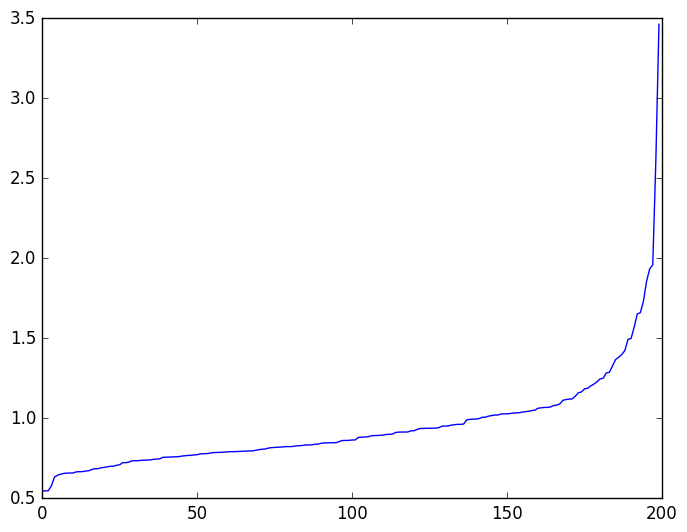

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x330765490>

In [15]:
plot(sort(dat2[:,4]./dat2[:,3]))

In [16]:
ord = sortperm(dat1[:,5]);

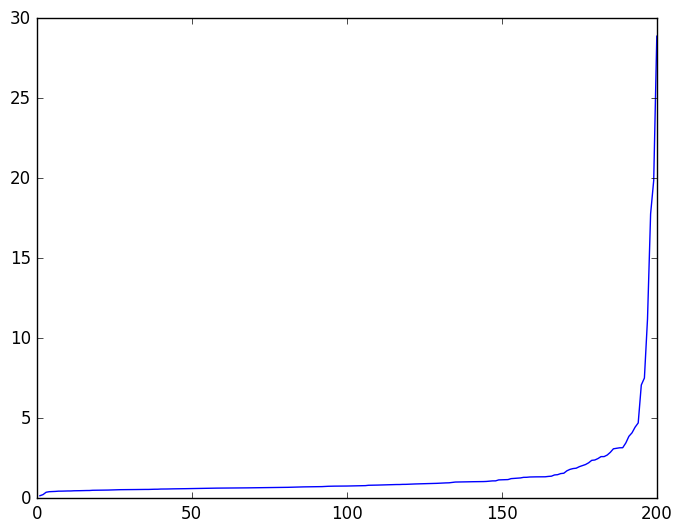

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x324591910>

In [28]:
xdat = collect(1:200)
pygui(false)
plot(xdat,sort(dat1[:,5]./dat1[:,4]),color="blue")
#plot(xdat,sort(dat1[ord,5]),color="red")

In [25]:
sum(2*dat1[:,2] .< dat1[:,5])

24

In [16]:
fsub =  KMPLapSolver(a, tol = 0.01, maxits = 10000, params=pl[1], verbose=true)
b = randn(200000)
x = fsub(b);

The graph is a tree.  Solve directly


LoadError: LoadError: MethodError: `call` has no method matching call(::Base.SparseMatrix.CHOLMOD.Factor{Float64}, ::Array{Float64,1})
Closest candidates are:
  BoundsError()
  BoundsError(!Matched::Any...)
  DivideError()
  ...
while loading In[16], in expression starting on line 3

In [7]:
b = randn(200000)
x = fsub(b);

In [17]:
pl[1]

KMPparams(0.0625,4,0.25,600,:rand)